<a href="https://colab.research.google.com/github/chohoon901/visualization/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%853.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/데이터_엔지니어링/시각화/earthquake_data.csv'
df = pd.read_csv(path)

In [ ]:
df['date'] = pd.to_datetime(df['date_time'])

In [ ]:
df.drop(columns='date_time',inplace=True)

In [ ]:
df['date_month'] = df.date.dt.month

In [ ]:
war=[]
for i,j in zip(list(df.magnitude),list(df.alert)):
  if i<6.5:
    j = 'white'
  elif 6.5<=i<6.75:
    j = 'blue'
  elif 6.75<=i<7.0:
    j = 'green'
  elif 7.0<=i<7.5:
    j = 'yellow'
  elif 7.5<=i<8.0:
    j = 'orange'
  else:
    j = 'red'
  war.append(j)

In [ ]:
df['warning'] = pd.Series(war)
x=list(df.longitude)
y=list(df.latitude)
pos = list(zip(y,x))
title_list = list(df.title)
date_list = list(df.date)
place = '/content/drive/MyDrive/Colab Notebooks/데이터_엔지니어링/시각화/PB2002_plates.json'

In [ ]:
from folium import FeatureGroup,LayerControl

In [ ]:
import folium

m = folium.Map(max_bounds=True,
           min_zoom=2,
           min_lat=-80,
           max_lat=90,
           min_lon=-180,
           max_lon=180)

folium.GeoJson(
    place,
    style_function=lambda feature: {
        'fillColor': '#000000',
        'color': 'white',
        'weight': 1        
    }
).add_to(m)

for i in range(len(df.index)):
  folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),
                
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(m)

In [ ]:
def make_map(mapp):
  mappp = folium.Map(max_bounds=True,
           min_zoom=2,
           min_lat=-80,
           max_lat=90,
           min_lon=-180,
           max_lon=180)
  
  folium.GeoJson(place,style_function=lambda feature: {'fillColor': '#000000','color': 'white','weight': 1}).add_to(mappp)

  if mapp == 'Blue(6.5~6.75)':
    for i in range(len(df.index)):
      if war[i]=='blue':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)
            
  if mapp == 'Green(6.75~7.0)':
    for i in range(len(df.index)):
      if war[i]=='green':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)
              
  if mapp == 'Yellow(7.0~7.5)':
    for i in range(len(df.index)):
      if war[i]=='yellow':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)

  if mapp == 'Orange(7.5~8.0)':
    for i in range(len(df.index)):
      if war[i]=='orange':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)

  if mapp == 'Red(8.0~)':
    for i in range(len(df.index)):
      if war[i]=='red':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)

  return display(mappp)

In [ ]:
option = 'Entire' #@param ['Blue(6.5~6.75)','Green(6.75~7.0)','Yellow(7.0~7.5)','Orange(7.5~8.0)','Red(8.0~)','Entire']
if option =='Blue(6.5~6.75)':
  make_map('Blue(6.5~6.75)')
elif option =='Green(6.75~7.0)':
  make_map('Green(6.75~7.0)')
elif option =='Yellow(7.0~7.5)':
  make_map('Yellow(7.0~7.5)')
elif option =='Orange(7.5~8.0)':
  make_map('Orange(7.5~8.0)')
elif option =='Red(8.0~)':
  make_map('Red(8.0~)')
else:
  display(m)

In [ ]:
mab = folium.Map(max_bounds=True,
           min_zoom=2,
           min_lat=-80,
           max_lat=90,
           min_lon=-180,
           max_lon=180)

folium.GeoJson(
    place,
    style_function=lambda feature: {
        'fillColor': '#000000',
        'color': 'white',
        'weight': 1        
    }
).add_to(mab)

In [ ]:
bblue = FeatureGroup(name='blue(6.5~6.75)')
ggreen = FeatureGroup(name='green(6.75~7.0)')
yyellow = FeatureGroup(name='yellow(7.0~7.5)')
oorange = FeatureGroup(name='orange(7.5~8.0)')
rred = FeatureGroup(name='red(8.0~)')

In [ ]:
for i in range(len(df.index)):
  if war[i]=='blue':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(bblue)
  
  elif war[i]=='green':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(ggreen)

  elif war[i]=='yellow':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(yyellow)

  elif war[i]=='orange':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(oorange)
                
  elif war[i]=='red':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(rred)

In [ ]:
bblue.add_to(mab)
ggreen.add_to(mab)
yyellow.add_to(mab)
oorange.add_to(mab)
rred.add_to(mab)

LayerControl().add_to(mab)

In [ ]:
mab

In [ ]:
df['date_year'] = df.date.dt.year
a = list(df.date_year.unique())
a.sort()

<AxesSubplot:xlabel='magnitude', ylabel='Count'>

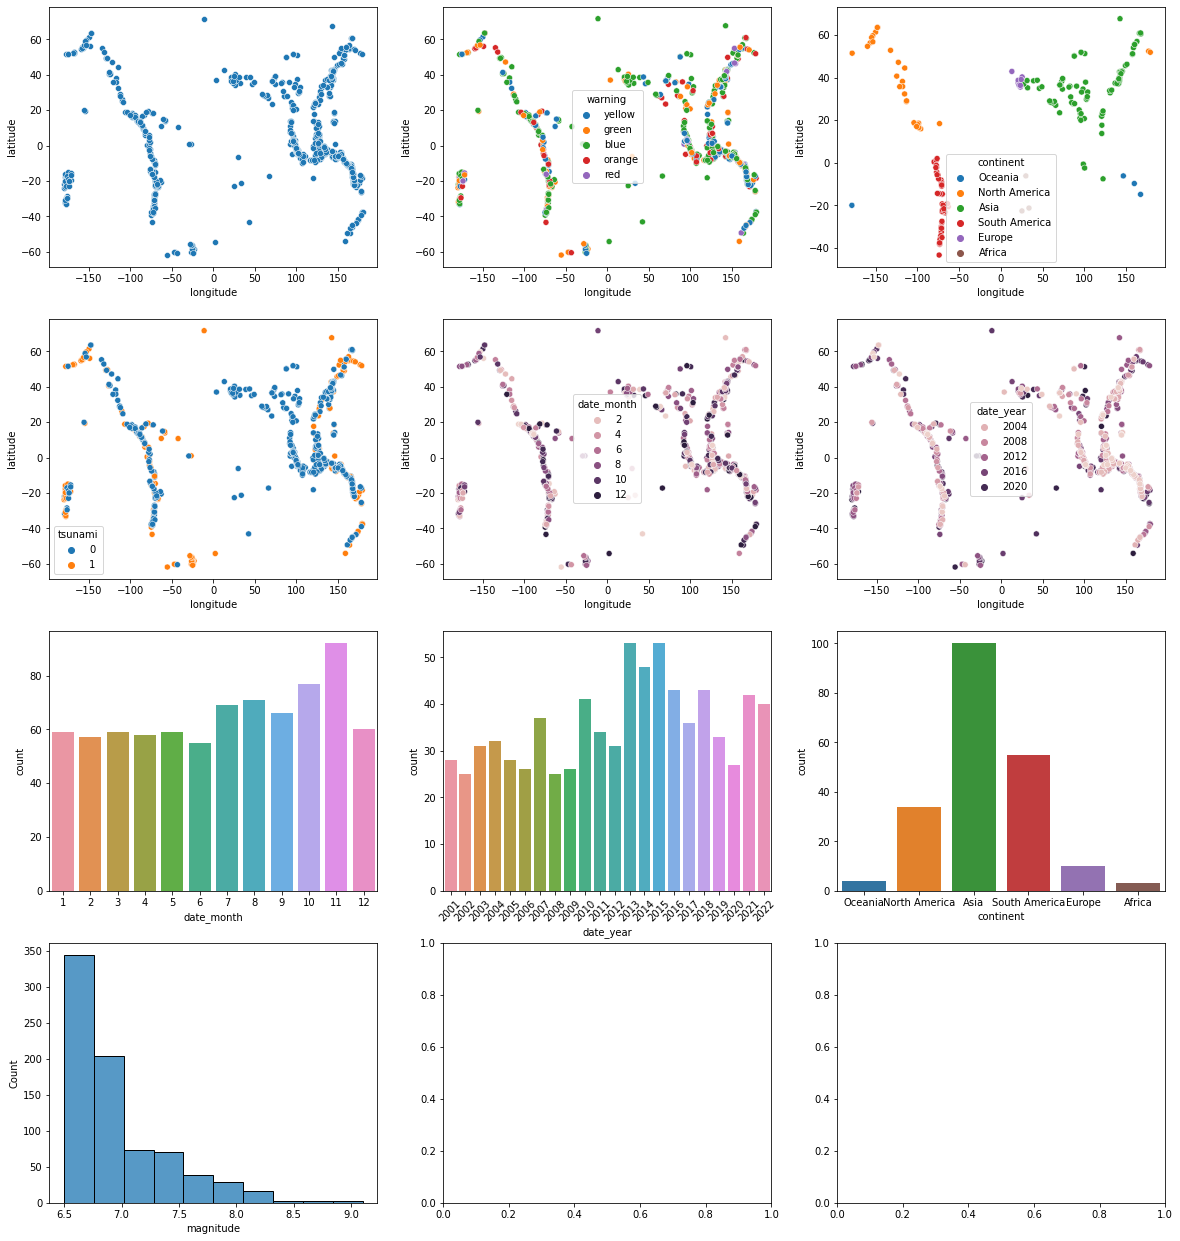

In [ ]:
fig, axs = plt.subplots(4,3,figsize = (20,22))
sns.scatterplot(data=df,x='longitude',y='latitude', ax = axs[0,0])
sns.scatterplot(data=df,x='longitude',y='latitude',hue='warning', ax = axs[0,1])
sns.scatterplot(data=df,x='longitude',y='latitude',hue='continent', ax = axs[0,2])
sns.scatterplot(data=df,x='longitude',y='latitude',hue='tsunami', ax = axs[1,0])
sns.scatterplot(data=df,x='longitude',y='latitude',hue='date_month', ax = axs[1,1])
sns.scatterplot(data=df,x='longitude',y='latitude',hue='date_year', ax = axs[1,2])
sns.countplot(data=df,x='date_month',ax = axs[2,0])
sns.countplot(data=df,x='date_year',ax = axs[2,1])
axs[2,1].set_xticklabels(a,rotation = 45);
sns.countplot(data=df,x='continent',ax = axs[2,2])
sns.histplot(data=df,x='magnitude',bins=10, ax = axs[3,0])

<AxesSubplot:xlabel='continent', ylabel='magnitude'>

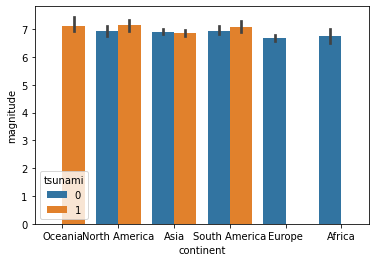

In [ ]:
sns.barplot(data=df,x='continent',y='magnitude',hue='tsunami')

In [ ]:
df.head()

,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,...,latitude,longitude,location,continent,country,date,date_month,warning,year,date_year
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,8,7,green,1,768,us,117,0.509,...,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands,2022-11-22 02:03:00,11,yellow,2022,2022
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,4,4,green,0,735,us,99,2.229,...,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN,2022-11-18 13:37:00,11,green,2022,2022
2,M 7.0 -,7.0,3,3,green,1,755,us,147,3.125,...,-20.0508,-178.346,NaN,Oceania,Fiji,2022-12-11 07:09:00,12,yellow,2022,2022
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,5,5,green,1,833,us,149,1.865,...,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN,2022-11-11 10:48:00,11,yellow,2022,2022
4,M 6.6 -,6.6,0,2,green,1,670,us,131,4.998,...,-25.5948,178.278,NaN,NaN,NaN,2022-09-11 10:14:00,9,blue,2022,2022


<AxesSubplot:xlabel='continent', ylabel='depth'>

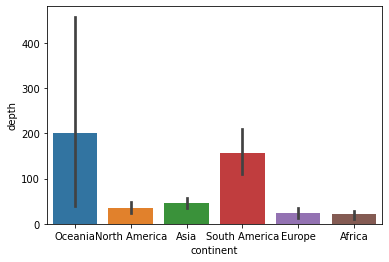

In [ ]:
sns.barplot(data=df,x='continent',y='depth')

<AxesSubplot:xlabel='magnitude', ylabel='Density'>

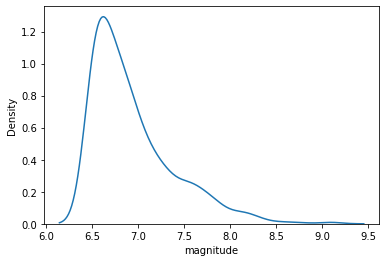

In [ ]:
sns.kdeplot(data=df,x='magnitude')

In [ ]:
df.corr()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,date_month,year,date_year
magnitude,1.000000,0.209549,0.285552,-0.004726,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,0.019214,-0.057083,-0.057083
cdi,0.209549,1.000000,0.317937,0.160266,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.048498,0.423158,0.423158
mmi,0.285552,0.317937,1.000000,-0.147363,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.027998,-0.212855,-0.212855
tsunami,-0.004726,0.160266,-0.147363,1.000000,-0.015500,-0.600231,0.400752,0.116360,0.056814,-0.113209,-0.136778,0.001256,0.647211,0.647211
sig,0.515871,0.479788,0.442423,-0.015500,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,0.008660,0.124439,0.124439
nst,0.113114,-0.175417,0.160417,-0.600231,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,0.019888,-0.688602,-0.688602
dmin,-0.091403,0.006554,-0.299074,0.400752,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.027084,0.529449,0.529449
gap,-0.110626,0.098143,-0.015723,0.116360,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.079773,0.194002,0.194002
depth,0.030644,-0.097891,-0.504439,0.056814,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,-0.010736,0.178220,0.178220
latitude,-0.008552,0.129003,0.144883,-0.113209,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,0.006655,-0.089731,-0.089731


<AxesSubplot:xlabel='magnitude', ylabel='sig'>

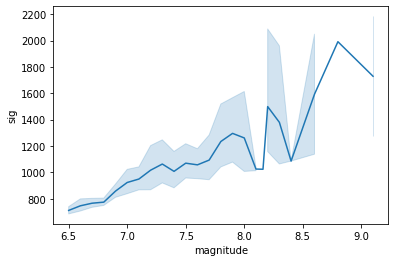

In [ ]:
sns.lineplot(data=df,x='magnitude',y='sig')

<AxesSubplot:xlabel='magnitude', ylabel='sig'>

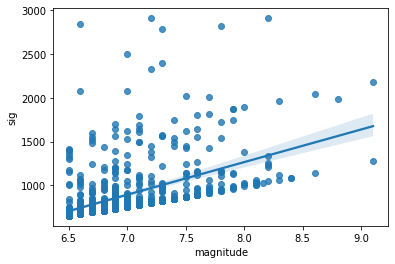

In [ ]:
sns.regplot(data=df,x='magnitude',y='sig')

<AxesSubplot:ylabel='magnitude'>

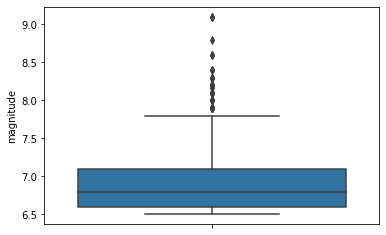

In [ ]:
sns.boxplot(data=df,y='magnitude')